In [15]:
import torch as t
from torch import nn as nn
from torch.nn import functional as F
import numpy as np

In [2]:
value = np.random.rand(5, 10)
value = t.Tensor(value)
x = value + 2
linear = nn.Linear(10, 1)
out = linear(x)
out = F.sigmoid(out)

/usr/lib/python3.7/site-packages/torch/nn/functional.py:1397: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [3]:
value

tensor([[0.3456, 0.7071, 0.9644, 0.5480, 0.7633, 0.8012, 0.0860, 0.8390, 0.5425,
         0.7753],
        [0.3635, 0.7884, 0.5794, 0.9060, 0.4822, 0.9004, 0.2338, 0.0813, 0.4595,
         0.3932],
        [0.8132, 0.0563, 0.1701, 0.4877, 0.7467, 0.2219, 0.7366, 0.1647, 0.1555,
         0.9063],
        [0.8042, 0.3919, 0.8402, 0.5503, 0.5837, 0.9603, 0.0924, 0.8149, 0.9104,
         0.4959],
        [0.7058, 0.8199, 0.4828, 0.5701, 0.2330, 0.6165, 0.4102, 0.6539, 0.2355,
         0.4943]])

In [4]:
linear

Linear(in_features=10, out_features=1, bias=True)

In [5]:
out

tensor([[0.7981],
        [0.7961],
        [0.7502],
        [0.8021],
        [0.7915]], grad_fn=<SigmoidBackward>)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 10)
        self.pool = nn.MaxPool2d(2, 2)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.log_softmax(self.fc1(x), dim=-1)
        return x
model = Net()

In [7]:
model

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [8]:
import matplotlib.pyplot as plt # shift-enter
# https://matplotlib.org/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py

In [9]:
# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

In [10]:
# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2


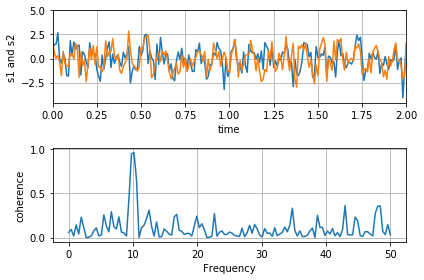

In [11]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)
cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

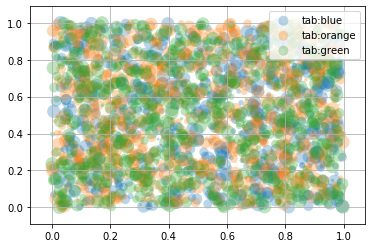

In [12]:
np.random.seed(19680801)

fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange', 'tab:green']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In [13]:
1 + 1

2

In [16]:
a=t.Tensor(2, 3)

In [17]:
a

tensor([[1.3452e-43, 0.0000e+00, 6.7262e-44],
        [0.0000e+00, 5.3762e-38, 6.7262e-44]])

In [ ]:
a.shape

In [18]:
b = t.Tensor([[1,2,3],[4,5,6]])

In [ ]:
b

In [ ]:
b.tolist()

In [19]:
b.shape

torch.Size([2, 3])

In [21]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display 

In [22]:
t.manual_seed(1000)

In [25]:
def get_fake_data(batch_size=8):
    x=t.rand(batch_size, 1) * 20
    y=x * 2 + (1 + t.randn(batch_size,1))*3
    return x,y

In [26]:
x,y=get_fake_data()

In [27]:
x

tensor([[ 7.8292],
        [ 8.8605],
        [13.1534],
        [ 8.5220],
        [ 6.9218],
        [13.6363],
        [16.2603],
        [ 4.5726]])

In [28]:
y

tensor([[18.9138],
        [21.1899],
        [34.6756],
        [19.4262],
        [15.6473],
        [31.8260],
        [33.3055],
        [10.9640]])

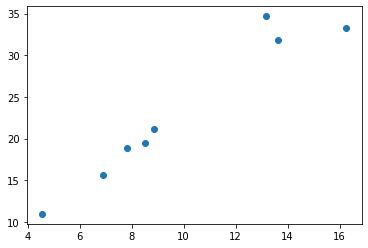

In [29]:
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())